In [ ]:
# default_exp backwards
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

# Graph 1

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModelHelper, visualize_heatmap, visualize_graph
import torch
import numpy as np

In [ ]:
num_clusters = 7
num_nodes=5*num_clusters
# create graph
start = [0,1,0,3,4,3]
end = [1,2,3,4,5,6]
edge_index = torch.tensor([start, end])
data = DirectedStochasticBlockModelHelper(num_nodes=num_nodes, num_clusters=7, edge_index=edge_index)[0]


In [ ]:
# save the graph
import os

folder = "trees"
file = "graph1_cylic.pt"

if folder not in os.listdir():
    os.makedirs(folder)

torch.save(data, f"{folder}/{file}")

In [ ]:
# load presaved data
data = torch.load("trees/rootedtree_7clusters_35nodes.pt")

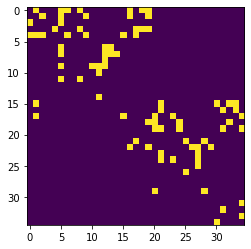

In [ ]:
visualize_heatmap(data.edge_index)

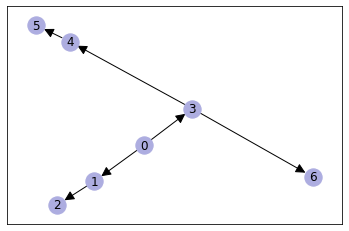

In [ ]:
from directed_graphs.datasets import visualize_edge_index
visualizes_edge_index(num_clusters, edge_index)

# Apply Backward node2vec

In [ ]:
from torch_geometric.utils import to_networkx
from directed_graphs.backwards import BackwardsNode2Vec
from torch_geometric.utils import to_networkx

G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_discount=0.2, dimensions=50, walk_length=20, num_walks=1000, workers=4)
emb = node2vec2_model.get_embeddings(window=1)
emb.shape

Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 250/250 [00:03<00:00, 80.90it/s] 

Generating walks (CPU: 3): 100%|██████████| 250/250 [00:03<00:00, 78.58it/s]


backward_discount = 0.2, dimension = 50, walk_length = 20, num_walks = 1000, window = 1


(35, 50)

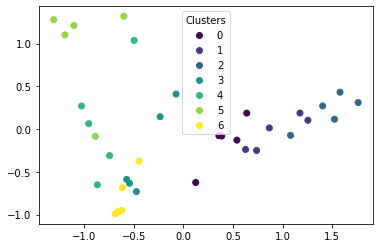

In [ ]:
from directed_graphs.datasets import plot_embeddings
plot_embeddings(emb, num_nodes, num_clusters)

# Same data with regular node2vec

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_discount=0.0, p=10, q=0.5, dimensions=3, walk_length=20, num_walks=1000, workers=4)
emb = node2vec2_model.get_embeddings(window=1)
emb.shape

Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 250/250 [00:02<00:00, 105.27it/s]


backward_discount = 0.0, dimension = 2, walk_length = 20, num_walks = 1000, window = 1


(35, 2)

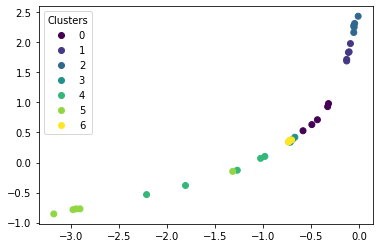

In [ ]:
plot_embeddings(emb, num_nodes, num_clusters)